# Exemplo 2 (UCIML)

Este conjunto de dados apresenta um compilado de características geométricas extraídas de uvas passas, incluindo medidas como área, excentricidade, entre outras propriedades físicas distintas. O propósito principal deste dataset é facilitar a classificação das uvas passas em duas categorias específicas: Kecimen ou Besni. Através da análise dessas informações geométricas detalhadas, busca-se desenvolver um modelo preciso que seja capaz de identificar a qual das duas variedades uma determinada uva passa pertence, auxiliando assim na automação e na precisão de processos de seleção e categorização desses frutos secos.

Çinar,İ̇lkay, Koklu,Murat, and Tasdemir,Sakir. (2023). Raisin. UCI Machine Learning Repository. https://doi.org/10.24432/C5660T.

In [54]:
!pip install ucimlrepo

In [55]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
raisin = fetch_ucirepo(id=850)

# data (as pandas dataframes)
X = raisin.data.features
y = raisin.data.targets

# metadata
print(raisin.metadata)

# variable information
print(raisin.variables)


{'uci_id': 850, 'name': 'Raisin', 'repository_url': 'https://archive.ics.uci.edu/dataset/850/raisin', 'data_url': 'https://archive.ics.uci.edu/static/public/850/data.csv', 'abstract': 'Images of the Kecimen and Besni raisin varieties were obtained with CVS. A total of 900 raisins were used, including 450 from both varieties, and 7 morphological features were extracted.', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 900, 'num_features': 7, 'feature_types': ['Real', 'Integer'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Fri Jan 05 2024', 'dataset_doi': '10.24432/C5660T', 'creators': ['İ̇lkay Çinar', 'Murat Koklu', 'Sakir Tasdemir'], 'intro_paper': {'ID': 261, 'type': 'NATIVE', 'title': 'Kuru Üzüm Tanelerinin Makine Görüşü ve Yapay Zeka Yöntemleri Kullanılarak Sınıflandırılması', 'authors': 'İ̇lkay Çinar

In [56]:
import pytensor.tensor as at
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pymc as pm
import arviz as az
import numpy as np
import pytensor.tensor as tt

In [57]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_s = scaler.fit_transform(X)

X_df = pd.DataFrame(X_s, index=X.index, columns=X.columns)

X_df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
0,-0.007186,0.097577,-0.023958,0.423142,-0.015709,1.106743,0.066274
1,-0.324217,-0.209012,-0.229292,0.224476,-0.304248,-0.287777,-0.161252
2,0.078292,0.097758,0.236988,0.186239,0.062113,-1.158250,0.155945
3,-1.074286,-1.245051,-0.915273,-1.069623,-1.076165,0.001711,-1.175915
4,-0.215393,-0.678958,0.727354,-2.409827,-0.238623,1.745259,-0.338639
...,...,...,...,...,...,...,...
895,-0.116882,-0.007352,-0.133092,0.395714,-0.131228,-0.574773,-0.134624
896,-0.011650,0.084554,0.096175,0.300071,-0.007046,-1.179518,0.176693
897,0.304072,0.006700,0.887674,-0.663114,0.370041,0.778289,0.463873
898,0.146711,0.391600,-0.006246,0.711173,0.158710,-0.761804,0.338586


In [58]:
coords = {'features': [col for col in X_df.columns]}
coords

{'features': ['Area',
  'MajorAxisLength',
  'MinorAxisLength',
  'Eccentricity',
  'ConvexArea',
  'Extent',
  'Perimeter']}

In [59]:
with pm.Model(coords=coords) as model_2:
    μ0 = pm.Normal("m0",0,1,dims="features")
    μ1 = pm.Normal("m1",0,1,dims="features")

    w = pm.Dirichlet("w",[0.5,0.5])

    sigma0 = pm.HalfNormal('sigma0', 1, dims="features")
    sigma1 = pm.HalfNormal('sigma1', 1, dims="features")

    cov_sigma0 = at.diag(sigma0)

    cov_sigma1 = at.diag(sigma1)

    components = [pm.MvNormal.dist(μ0, cov_sigma0)
                 ,pm.MvNormal.dist(μ1, cov_sigma1)]
    g = pm.Mixture("g",w,components,observed=X_df.values)



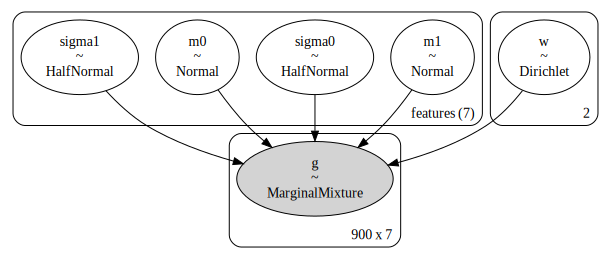

In [60]:
pm.model_to_graphviz(model_2)

In [61]:
with model_2:
  trace = pm.sample()

Output()

In [62]:
pm.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
m0[Area],1.052,0.052,0.950,1.146,0.001,0.001,2877.0,1702.0,1.00
m0[MajorAxisLength],1.057,0.050,0.966,1.155,0.001,0.001,4555.0,1686.0,1.00
m0[MinorAxisLength],0.899,0.053,0.805,1.003,0.001,0.001,3686.0,1408.0,1.00
m0[Eccentricity],0.524,0.043,0.444,0.602,0.001,0.001,4917.0,1509.0,1.00
m0[ConvexArea],1.049,0.055,0.944,1.151,0.001,0.001,3423.0,1532.0,1.00
m0[Extent],-0.154,0.074,-0.286,-0.023,0.001,0.002,4783.0,1448.0,1.00
m0[Perimeter],1.062,0.046,0.980,1.149,0.001,0.001,3216.0,1337.0,1.00
m1[Area],-0.594,0.018,-0.628,-0.559,0.000,0.000,2996.0,1615.0,1.00
m1[MajorAxisLength],-0.596,0.022,-0.635,-0.552,0.000,0.001,3584.0,1792.0,1.00
m1[MinorAxisLength],-0.506,0.028,-0.562,-0.455,0.000,0.001,5153.0,1467.0,1.00


In [63]:
with model_2:
  trace_post = pm.sample_posterior_predictive(trace)

Output()

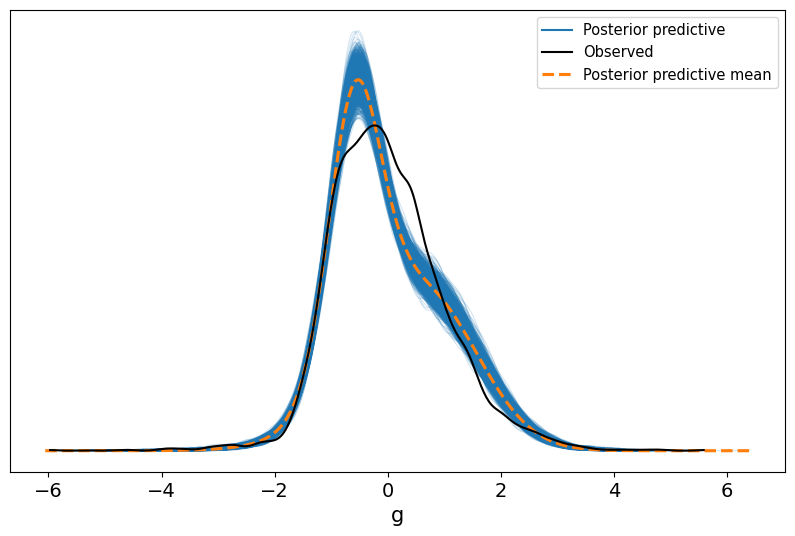

In [64]:
az.plot_ppc(trace_post, mean=True, figsize=(10, 6), textsize=14)

plt.show()

In [65]:
trace_post.posterior_predictive

<xarray.Dataset> Size: 101MB
Dimensions:  (chain: 2, draw: 1000, g_dim_0: 900, g_dim_1: 7)
Coordinates:
  * chain    (chain) int64 16B 0 1
  * draw     (draw) int64 8kB 0 1 2 3 4 5 6 7 ... 993 994 995 996 997 998 999
  * g_dim_0  (g_dim_0) int64 7kB 0 1 2 3 4 5 6 7 ... 893 894 895 896 897 898 899
  * g_dim_1  (g_dim_1) int64 56B 0 1 2 3 4 5 6
Data variables:
    g        (chain, draw, g_dim_0, g_dim_1) float64 101MB -0.4088 ... -0.5443
Attributes:
    created_at:                 2025-04-07T23:39:48.221416+00:00
    arviz_version:              0.21.0
    inference_library:          pymc
    inference_library_version:  5.21.2

In [66]:
g_samples = trace_post.posterior_predictive["g"]

mean_predictions = g_samples.mean(dim=('chain', 'draw')).values

clusters = np.argmax(mean_predictions, axis=1)

clusters

array([3, 5, 6, 4, 5, 6, 6, 4, 6, 6, 5, 2, 2, 5, 0, 3, 1, 4, 1, 5, 5, 3,
       4, 3, 0, 3, 0, 3, 6, 0, 3, 5, 5, 1, 6, 1, 1, 3, 4, 3, 1, 0, 0, 6,
       2, 6, 2, 3, 1, 5, 5, 0, 0, 5, 5, 5, 3, 5, 0, 5, 1, 6, 2, 2, 2, 0,
       2, 3, 5, 3, 2, 2, 5, 2, 4, 6, 4, 2, 5, 1, 2, 2, 5, 4, 5, 4, 1, 3,
       4, 5, 2, 3, 1, 1, 6, 3, 5, 3, 3, 5, 3, 5, 0, 6, 6, 4, 4, 3, 5, 0,
       1, 1, 1, 0, 3, 5, 6, 2, 5, 1, 6, 0, 5, 6, 2, 0, 4, 6, 5, 3, 5, 0,
       3, 3, 5, 3, 5, 1, 6, 2, 2, 5, 1, 2, 5, 4, 6, 5, 2, 2, 2, 2, 5, 0,
       5, 4, 3, 5, 3, 6, 4, 3, 6, 6, 6, 2, 4, 3, 5, 4, 0, 5, 4, 4, 3, 0,
       4, 6, 3, 4, 2, 2, 0, 4, 5, 6, 0, 3, 0, 1, 5, 5, 5, 4, 6, 2, 5, 6,
       0, 5, 1, 3, 1, 2, 2, 1, 5, 4, 5, 6, 4, 4, 6, 6, 5, 2, 0, 1, 2, 2,
       1, 0, 6, 2, 4, 2, 6, 1, 3, 6, 5, 2, 3, 5, 6, 3, 2, 0, 3, 2, 2, 5,
       5, 5, 2, 1, 6, 0, 6, 5, 6, 1, 3, 6, 1, 6, 5, 1, 4, 2, 5, 5, 5, 4,
       1, 4, 5, 0, 6, 1, 2, 6, 1, 4, 0, 5, 2, 3, 2, 4, 6, 3, 2, 1, 6, 5,
       0, 3, 0, 6, 0, 6, 1, 5, 5, 4, 2, 5, 3, 4, 4,

In [67]:
X_df["Cluster"] = clusters
y['Class'] = y['Class'].map({'Kecimen': 1, 'Besni': 0})
df_all = pd.concat([X_df, y], axis=1)
display(df_all)
df_all.to_csv("df_all_clusters.csv",index = False)

<ipython-input-67-9a6b534775f8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['Class'] = y['Class'].map({'Kecimen': 1, 'Besni': 0})


,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Cluster,Class
0,-0.007186,0.097577,-0.023958,0.423142,-0.015709,1.106743,0.066274,3,1
1,-0.324217,-0.209012,-0.229292,0.224476,-0.304248,-0.287777,-0.161252,5,1
2,0.078292,0.097758,0.236988,0.186239,0.062113,-1.158250,0.155945,6,1
3,-1.074286,-1.245051,-0.915273,-1.069623,-1.076165,0.001711,-1.175915,4,1
4,-0.215393,-0.678958,0.727354,-2.409827,-0.238623,1.745259,-0.338639,5,1
...,...,...,...,...,...,...,...,...,...
895,-0.116882,-0.007352,-0.133092,0.395714,-0.131228,-0.574773,-0.134624,4,0
896,-0.011650,0.084554,0.096175,0.300071,-0.007046,-1.179518,0.176693,5,0
897,0.304072,0.006700,0.887674,-0.663114,0.370041,0.778289,0.463873,0,0
898,0.146711,0.391600,-0.006246,0.711173,0.158710,-0.761804,0.338586,2,0


1) Faça uma regressão logística hierárquica usando os clusters acima. Qual foi a acurácia obtida pelo modelo?

In [68]:
df_all = pd.read_csv("df_all_clusters.csv")

In [69]:
# Verificando se há linhas vazias
linhas_vazias_df = df_all.isna().sum()
print(linhas_vazias_df)

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Cluster            0
Class              0
dtype: int64


In [70]:
x_f = df_all.drop(['Class'], axis=1)
y_t = df_all['Class']

In [71]:
x_f.describe()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Cluster
count,9.000000e+02,900.000000,9.000000e+02,9.000000e+02,9.000000e+02,9.000000e+02,9.000000e+02,900.000000
mean,1.894781e-16,0.000000,-8.210716e-16,6.947529e-16,1.263187e-16,1.452665e-15,-6.315935e-17,3.274444
std,1.000556e+00,1.000556,1.000556e+00,1.000556e+00,1.000556e+00,1.000556e+00,1.000556e+00,1.904042
min,-1.601242e+00,-1.770279,-2.217269e+00,-4.794739e+00,-1.596379e+00,-5.981678e+00,-1.998568e+00,0.000000
25%,-7.300105e-01,-0.737144,-7.080907e-01,-4.406412e-01,-7.282280e-01,-5.359214e-01,-7.291192e-01,2.000000
50%,-2.283742e-01,-0.199413,-1.328978e-01,1.916942e-01,-2.340093e-01,1.470669e-01,-1.695745e-01,3.000000
75%,4.418658e-01,0.545458,5.084041e-01,6.760837e-01,4.218670e-01,6.640063e-01,5.207484e-01,5.000000
max,3.777353e+00,4.883667,4.759444e+00,2.000508e+00,4.590095e+00,2.543983e+00,5.598604e+00,6.000000


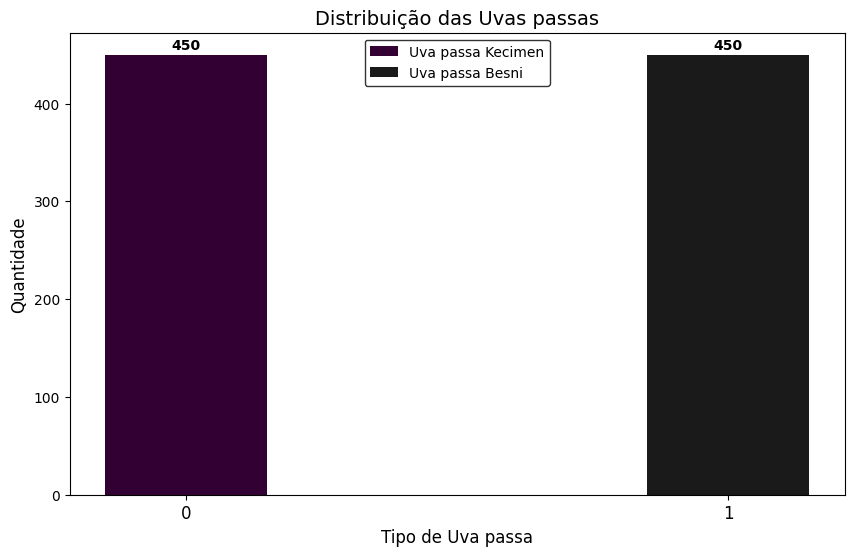

In [72]:
counts = y_t.value_counts().sort_index()

bar_colors = ['#330033', '#1a1a1a']
legend_labels = ['Uva passa Kecimen', 'Uva passa Besni']

fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.bar([0, 1], counts, color=bar_colors, width=0.3)

for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + 2,
        f'{int(height)}',
        ha='center', va='bottom',
        fontsize=10, fontweight='bold', color='black'
    )


ax.set_xticks([0, 1])
ax.set_xticklabels(['0', '1'], fontsize=12, color='black')

ax.set_xlabel('Tipo de Uva passa', fontsize=12, color='black')
ax.set_ylabel('Quantidade', fontsize=12, color='black')
ax.set_title('Distribuição das Uvas passas', fontsize=14, color='black')

ax.legend(bars, legend_labels, loc='upper center', facecolor='white', edgecolor='black', fontsize=10)

plt.show()

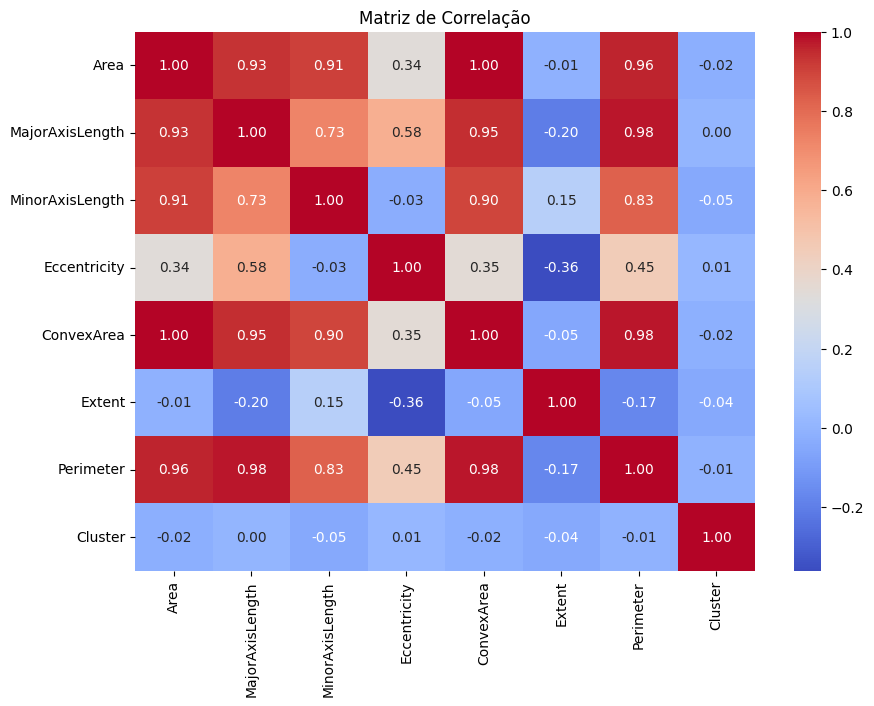

In [73]:
plt.figure(figsize=(10,7))
ax = sns.heatmap(x_f.corr(), annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
ax.set_title("Matriz de Correlação")
plt.show()


In [74]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

x_f_const = sm.add_constant(x_f)

vif_data = pd.DataFrame({
    'Variável': x_f_const.columns,
    'VIF': [variance_inflation_factor(x_f_const.values, i) for i in range(x_f_const.shape[1])]
})

print(vif_data)

          Variável         VIF
0            const    3.995665
1             Area  405.402338
2  MajorAxisLength  129.155019
3  MinorAxisLength   40.335721
4     Eccentricity    5.241968
5       ConvexArea  446.679142
6           Extent    1.605390
7        Perimeter  184.500315
8          Cluster    1.011785


In [75]:
from sklearn.decomposition import PCA

features_group = ['Area', 'MajorAxisLength','MinorAxisLength','Eccentricity','ConvexArea','Perimeter']

X_group = x_f[features_group]

pca = PCA(n_components=1)
combined_feature = pca.fit_transform(X_group)
x_f['pca'] = combined_feature
display(x_f)

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Cluster,pca
0,-0.007186,0.097577,-0.023958,0.423142,-0.015709,1.106743,0.066274,3,0.137214
1,-0.324217,-0.209012,-0.229292,0.224476,-0.304248,-0.287777,-0.161252,5,-0.494327
2,0.078292,0.097758,0.236988,0.186239,0.062113,-1.158250,0.155945,6,0.307014
3,-1.074286,-1.245051,-0.915273,-1.069623,-1.076165,0.001711,-1.175915,4,-2.623181
4,-0.215393,-0.678958,0.727354,-2.409827,-0.238623,1.745259,-0.338639,5,-0.849830
...,...,...,...,...,...,...,...,...,...
895,-0.116882,-0.007352,-0.133092,0.395714,-0.131228,-0.574773,-0.134624,4,-0.149722
896,-0.011650,0.084554,0.096175,0.300071,-0.007046,-1.179518,0.176693,5,0.205953
897,0.304072,0.006700,0.887674,-0.663114,0.370041,0.778289,0.463873,0,0.733815
898,0.146711,0.391600,-0.006246,0.711173,0.158710,-0.761804,0.338586,2,0.602264


In [76]:
x_f = x_f.drop(['Area',	'MajorAxisLength',	'MinorAxisLength','Eccentricity',	'ConvexArea',	'Perimeter'], axis=1)

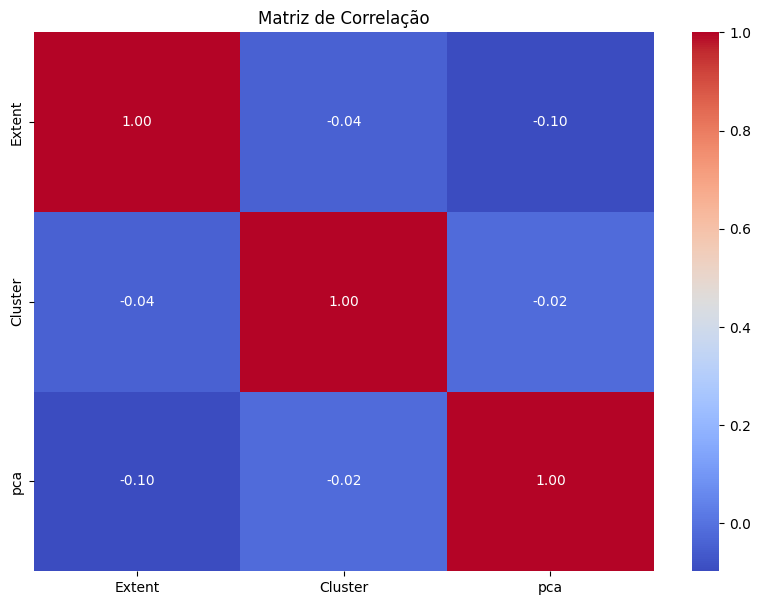

In [77]:
plt.figure(figsize=(10,7))
ax = sns.heatmap(x_f.corr(), annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
ax.set_title("Matriz de Correlação")
plt.show()


In [78]:
x_f_const = sm.add_constant(x_f)

vif_data = pd.DataFrame({
    'Variável': x_f_const.columns,
    'VIF': [variance_inflation_factor(x_f_const.values, i) for i in range(x_f_const.shape[1])]
})

print(vif_data)

  Variável       VIF
0    const  3.967803
1   Extent  1.011676
2  Cluster  1.002375
3      pca  1.010015


In [79]:
from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x_f, y_t, test_size=0.2, random_state=42)

In [80]:
display(x_treino)

,Extent,Cluster,pca
10,-0.472921,5,-0.082685
334,0.124851,2,-1.234109
244,1.172257,2,-0.397941
678,0.627880,3,4.757963
306,1.621249,3,-1.123305
...,...,...,...
106,0.219627,4,-2.816645
270,0.969930,2,-2.201830
860,1.010690,1,3.952281
435,-1.444935,0,-3.667385


In [81]:
display(y_treino)

,Class
10,1
334,1
244,1
678,0
306,1
...,...
106,1
270,1
860,0
435,1


In [82]:
clusters  = x_treino['Cluster'].values

In [83]:
coords_2 = {'clusters':np.unique(clusters),
            'predictors' : ['Extent', 'pca']}
clusters_index = pd.Categorical(clusters).codes

In [84]:
with pm.Model(coords=coords_2) as model_logistic_h:
    alpha = pm.Normal("alpha", mu=0, sigma=0.5, dims="clusters")

    beta = pm.Normal("beta", mu=0, sigma=0.5, dims=("predictors", "clusters"))

    X_data = pm.MutableData("X", x_treino[['Extent', 'pca']].values)

    cluster_idx = pm.MutableData("cluster_idx", clusters_index)

    beta_cluster = beta.T[cluster_idx]
    y= pm.MutableData("y", y_treino)

    mu = alpha[cluster_idx] + tt.sum(X_data * beta_cluster, axis=1)

    likelihood = pm.Bernoulli("likelihood", p=pm.math.sigmoid(mu), observed=y)

/usr/local/lib/python3.11/dist-packages/pymc/data.py:265: FutureWarning: MutableData is deprecated. All Data variables are now mutable. Use Data instead.
  warnings.warn(


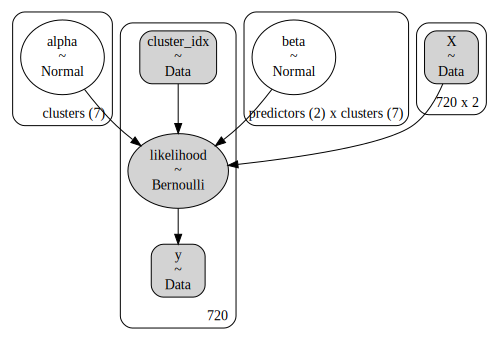

In [85]:
pm.model_to_graphviz(model_logistic_h)

In [86]:
with model_logistic_h:
  trace_logistic = pm.sample()

Output()

In [87]:
pm.summary(trace_logistic)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha[0],0.156,0.242,-0.306,0.609,0.004,0.006,3793.0,1532.0,1.0
alpha[1],-0.120,0.276,-0.668,0.363,0.004,0.007,4309.0,1598.0,1.0
alpha[2],-0.016,0.278,-0.575,0.475,0.004,0.007,3928.0,1691.0,1.0
alpha[3],-0.729,0.251,-1.191,-0.252,0.004,0.005,3703.0,1604.0,1.0
alpha[4],-0.085,0.234,-0.499,0.367,0.004,0.005,4454.0,1407.0,1.0
alpha[5],-0.694,0.227,-1.097,-0.229,0.004,0.005,3391.0,1710.0,1.0
alpha[6],-0.127,0.258,-0.621,0.349,0.004,0.006,5203.0,1535.0,1.0
"beta[Extent, 0]",0.079,0.277,-0.467,0.596,0.004,0.009,4704.0,1206.0,1.0
"beta[Extent, 1]",0.497,0.285,-0.036,1.011,0.004,0.006,4393.0,1635.0,1.0
"beta[Extent, 2]",0.319,0.333,-0.294,0.985,0.005,0.008,4616.0,1299.0,1.0


array([[<Axes: title={'center': 'alpha'}>,
        <Axes: title={'center': 'alpha'}>],
       [<Axes: title={'center': 'beta'}>,
        <Axes: title={'center': 'beta'}>]], dtype=object)

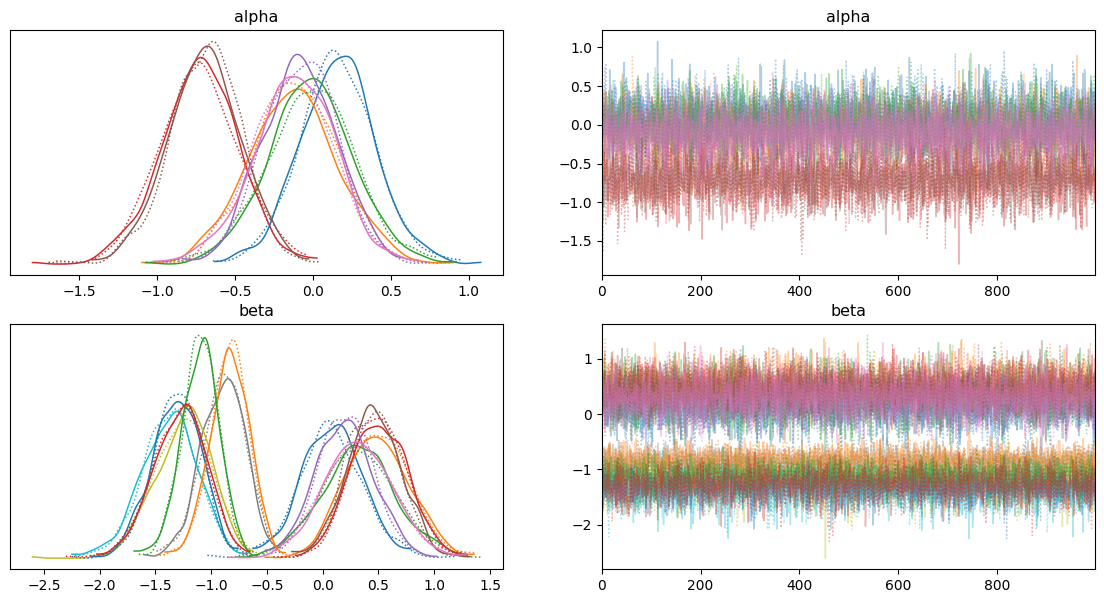

In [88]:
az.plot_trace(trace_logistic, figsize=(14, 7))

In [89]:
vars = {
    "X": x_teste[['Extent', 'pca']].values,
    "cluster_idx": pd.Categorical(x_teste['Cluster']).codes,
    "y": y_teste
}


In [90]:
with model_logistic_h:
  pm.set_data(vars)
  trace_post_logistic = pm.sample_posterior_predictive(trace_logistic)

Output()

In [91]:
mean_likelihood = trace_post_logistic.posterior_predictive['likelihood'].mean(dim=['chain', 'draw'])
pred = (mean_likelihood > 0.5).astype(int)

In [92]:
abs_diff = np.abs(y_teste - pred)

df_testes = pd.DataFrame({
    'y_teste': y_teste,
    'Pred_modelo': pred,
    'abs_diff': abs_diff
})

display(df_testes)

,y_teste,Pred_modelo,abs_diff
70,1,0,1
827,0,1,1
231,1,1,0
588,0,0,0
39,1,1,0
...,...,...,...
897,0,0,0
578,0,0,0
779,0,0,0
25,1,1,0


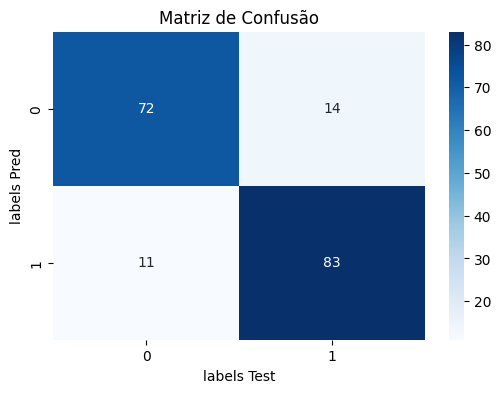

In [93]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_teste, pred)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusão")
plt.xlabel('labels Test')
plt.ylabel('labels Pred')
plt.show()

In [94]:
from sklearn.metrics import (accuracy_score, balanced_accuracy_score,
                             precision_score, recall_score,f1_score,
                             cohen_kappa_score)
from statsmodels.stats.proportion import proportion_confint
from scipy.stats import binomtest
from statsmodels.stats.contingency_tables import mcnemar

errors = df_testes['abs_diff'].sum()
accuracy = (len(df_testes)-errors)/len(df_testes)

n = len(y_teste)

cm = confusion_matrix(y_teste, pred)
TN, FP, FN, TP = cm.ravel()


ci_low, ci_upp = proportion_confint(count=int(accuracy * n), nobs=n, alpha=0.05, method='wilson')

classes, counts = np.unique(y_teste, return_counts=True)
NIR = np.max(counts) / n

result_binom = binomtest(k=int(accuracy * n), n=n, p=NIR, alternative='greater')
p_value_acc_gt_NIR = result_binom.pvalue

kappa = cohen_kappa_score(y_teste, pred)

sensitivity = TP / (TP + FN) if (TP + FN) > 0 else np.nan

specificity = TN / (TN + FP) if (TN + FP) > 0 else np.nan

pos_pred_value = precision_score(y_teste, pred)

f1 = f1_score(y_teste, pred)

neg_pred_value = TN / (TN + FN) if (TN + FN) > 0 else np.nan

prevalence = np.sum(y_teste == 1) / n

detection_rate = TP / n

detection_prevalence = (TP + FP) / n

balanced_accuracy = balanced_accuracy_score(y_teste, pred)

table_mcnemar = [[0, FP],
                 [FN, 0]]
result_mcnemar = mcnemar(table_mcnemar, exact=True)
mcnemar_p_value = result_mcnemar.pvalue

print(f"Acurácia no conjunto de teste: {accuracy*100:.2f}%")
print(f"\nErros no conjunto de teste: {errors}")
print("\n95% CI da Acurácia: [{:.3f}, {:.3f}]".format(ci_low, ci_upp))
print("\nNo Information Rate: {:.3f}".format(NIR))
print("\nP-Value [Acc > NIR]: {:.3f}".format(p_value_acc_gt_NIR))
print("\nKappa: {:.3f}".format(kappa))
print("\nMcnemar's Test P-Value: {:.3f}".format(mcnemar_p_value))
print("\nSensitivity (Recall): {:.3f}".format(sensitivity))
print("\nSpecificity: {:.3f}".format(specificity))
print("\nPos Pred Value (Precision): {:.3f}".format(pos_pred_value))
print(f"\nF1 Score: {f1:.3f}")
print("\nNeg Pred Value: {:.3f}".format(neg_pred_value))
print("\nPrevalence: {:.3f}".format(prevalence))
print("\nDetection Rate: {:.3f}".format(detection_rate))
print("\nDetection Prevalence: {:.3f}".format(detection_prevalence))
print("\nBalanced Accuracy: {:.3f}".format(balanced_accuracy))

Acurácia no conjunto de teste: 86.11%

Erros no conjunto de teste: 25

95% CI da Acurácia: [0.803, 0.904]

No Information Rate: 0.522

P-Value [Acc > NIR]: 0.000

Kappa: 0.721

Mcnemar's Test P-Value: 0.690

Sensitivity (Recall): 0.883

Specificity: 0.837

Pos Pred Value (Precision): 0.856

F1 Score: 0.869

Neg Pred Value: 0.867

Prevalence: 0.522

Detection Rate: 0.461

Detection Prevalence: 0.539

Balanced Accuracy: 0.860


acurácia 86.11%, F1 Score 86.9% e a acurácia balanceada 86%, demontrando um desempenho sólido do modelo hierárquico usando os clusters

2) Na análise proposta no exercício 2, adotamos inicialmente um modelo de mistura baseado em uma suposição a priori bi-modal para interpretar os dados. Faça uma análise através do desenvolvimento de um novo modelo que incorpore uma hipótese a priori tri-modal. O objetivo principal é explorar o impacto dessa nova suposição na modelagem e interpretação dos dados. Compare os modelos usando o LOO.

In [95]:
X_df= X_df.drop(['Cluster'], axis=1)
display(X_df)

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
0,-0.007186,0.097577,-0.023958,0.423142,-0.015709,1.106743,0.066274
1,-0.324217,-0.209012,-0.229292,0.224476,-0.304248,-0.287777,-0.161252
2,0.078292,0.097758,0.236988,0.186239,0.062113,-1.158250,0.155945
3,-1.074286,-1.245051,-0.915273,-1.069623,-1.076165,0.001711,-1.175915
4,-0.215393,-0.678958,0.727354,-2.409827,-0.238623,1.745259,-0.338639
...,...,...,...,...,...,...,...
895,-0.116882,-0.007352,-0.133092,0.395714,-0.131228,-0.574773,-0.134624
896,-0.011650,0.084554,0.096175,0.300071,-0.007046,-1.179518,0.176693
897,0.304072,0.006700,0.887674,-0.663114,0.370041,0.778289,0.463873
898,0.146711,0.391600,-0.006246,0.711173,0.158710,-0.761804,0.338586


In [108]:
coords = {'features': [col for col in X_df.columns]}
coords

{'features': ['Area',
  'MajorAxisLength',
  'MinorAxisLength',
  'Eccentricity',
  'ConvexArea',
  'Extent',
  'Perimeter']}

In [109]:
with pm.Model(coords=coords) as model_3:
    μ0 = pm.Normal("m0", mu=0, sigma=1, dims="features")
    μ1 = pm.Normal("m1", mu=0, sigma=1, dims="features")
    μ2 = pm.Normal("m2", mu=0, sigma=1, dims="features")

    w = pm.Dirichlet("w", a=[1/3, 1/3, 1/3])

    sigma0 = pm.HalfNormal('sigma0', sigma=1, dims="features")
    sigma1 = pm.HalfNormal('sigma1', sigma=1, dims="features")
    sigma2 = pm.HalfNormal('sigma2', sigma=1, dims="features")

    cov_sigma0 = at.diag(sigma0)
    cov_sigma1 = at.diag(sigma1)
    cov_sigma2 = at.diag(sigma2)

    components = [
        pm.MvNormal.dist(μ0, cov_sigma0),
        pm.MvNormal.dist(μ1, cov_sigma1),
        pm.MvNormal.dist(μ2, cov_sigma2)
    ]

    g = pm.Mixture("g", w, components, observed=X_df.values)



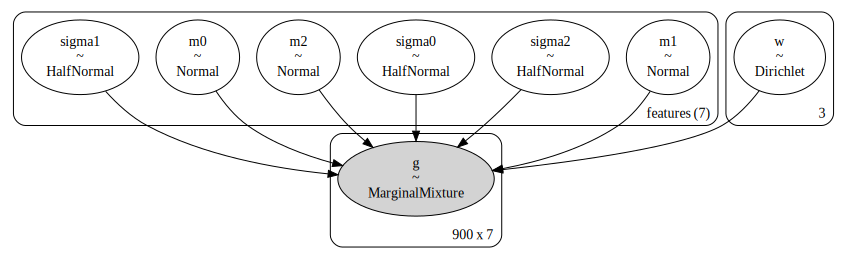

In [110]:
pm.model_to_graphviz(model_3)

In [111]:
with model_3:
  trace_3= pm.sample()

Output()

In [112]:
pm.summary(trace_3)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
m0[Area],1.504,0.067,1.379,1.631,0.002,0.001,778.0,885.0,1.00
m0[MajorAxisLength],1.447,0.061,1.336,1.561,0.002,0.001,1132.0,1412.0,1.00
m0[MinorAxisLength],1.248,0.074,1.115,1.384,0.003,0.002,862.0,1198.0,1.00
m0[Eccentricity],0.605,0.054,0.499,0.701,0.001,0.001,3167.0,1462.0,1.00
m0[ConvexArea],1.498,0.071,1.364,1.627,0.003,0.002,740.0,1076.0,1.00
m0[Extent],-0.154,0.096,-0.329,0.020,0.002,0.002,2774.0,1484.0,1.00
m0[Perimeter],1.455,0.060,1.347,1.570,0.002,0.001,974.0,1451.0,1.00
m1[Area],-0.041,0.026,-0.093,0.003,0.001,0.001,454.0,614.0,1.00
m1[MajorAxisLength],0.018,0.033,-0.049,0.078,0.002,0.001,487.0,740.0,1.00
m1[MinorAxisLength],0.072,0.029,0.011,0.121,0.001,0.001,1345.0,1572.0,1.00


In [113]:
with model_3:
  trace_post_3 = pm.sample_posterior_predictive(trace_3)

Output()

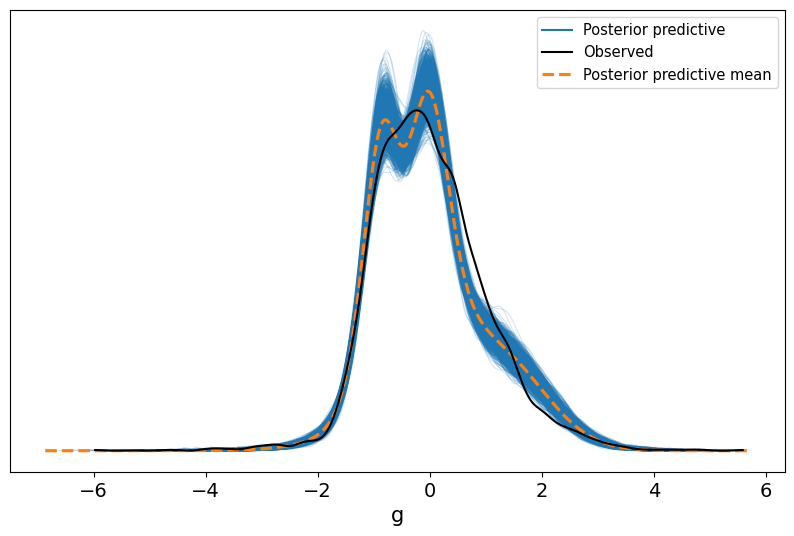

In [114]:
az.plot_ppc(trace_post_3, mean=True, figsize=(10, 6), textsize=14)

plt.show()

In [115]:
with model_2:
    pm.compute_log_likelihood(trace)

with model_3:
    pm.compute_log_likelihood(trace_3)


Output()

Output()

/usr/local/lib/python3.11/dist-packages/arviz/stats/stats.py:797: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

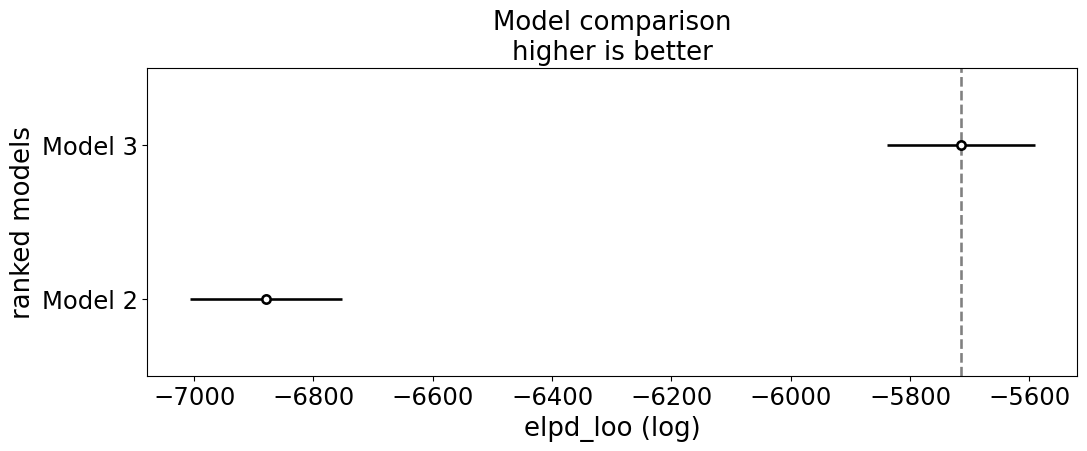

In [116]:
model_compare = az.compare(
    {
        "Model 2": trace,
        "Model 3": trace_3
    }, method='BB-pseudo-BMA'
)
az.plot_compare(model_compare, figsize=(12, 4), insample_dev=False)

In [117]:
model_compare

,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
Model 3,0,-5714.422120,92.678425,0.000000,1.0,123.981160,0.000000,True,log
Model 2,1,-6879.738686,41.492370,1165.316565,0.0,127.937262,70.361845,False,log


O modelo 3 que tem a priori tri-modal se saiu muito na frente do modelo 2, visto no gráfico da posteriori e no gráfico do elpd_loo